<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Light_curves_using_Lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
!pip install lightkurve -quiet
import lightkurve as lk


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [19]:
source = lk.search_lightcurve("kplr011446443", author="Kepler", cadence="long",quarter = 9).download().remove_nans() 
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5367739679132,4.0344128e+05,1.7206509e+01,1100000000010000000,-6.180521e-04,621.20359,848.96577,34238,4.0456928e+05,1.7136110e+01,5.0124282e+03,8.9312845e-01,4.0344128e+05,1.7206509e+01,1100000000010000000,nan,nan,nan,nan,621.20359,4.3693453e-05,848.96577,5.6304852e-05,1.3538879e-02,6.3926294e-02
808.5572080306083,4.0337869e+05,1.7208021e+01,1100000000010000000,-6.175894e-04,621.20382,848.96548,34239,4.0463694e+05,1.7135906e+01,5.0141406e+03,8.9341098e-01,4.0337869e+05,1.7208021e+01,1100000000010000000,nan,nan,nan,nan,621.20382,4.3685250e-05,848.96548,5.6284840e-05,1.3703740e-02,6.3693479e-02
808.5776420934708,4.0330584e+05,1.7220509e+01,1100000000000000000,-6.171265e-04,621.20379,848.96526,34240,4.0463225e+05,1.7135572e+01,5.0123887e+03,8.9193231e-01,4.0330584e+05,1.7220509e+01,1100000000000000000,nan,nan,nan,nan,621.20379,4.3682561e-05,848.96526,5.6277422e-05,1.3627556e-02,6.3662983e-02
808.5980761565152,4.0319994e+05,1.7213947e+01,1100000000000000000,-6.166635e-04,621.20382,848.96496,34241,4.0457156e+05,1.7134609e+01,5.0121719e+03,8.9264071e-01,4.0319994e+05,1.7213947e+01,1100000000000000000,nan,nan,nan,nan,621.20382,4.3684890e-05,848.96496,5.6287772e-05,1.3677599e-02,6.3459679e-02
808.6185103196767,4.0320144e+05,1.7194426e+01,1100000000000000000,-6.162003e-04,621.20380,848.96475,34242,4.0457700e+05,1.7134583e+01,5.0116235e+03,8.9327544e-01,4.0320144e+05,1.7194426e+01,1100000000000000000,nan,nan,nan,nan,621.20380,4.3686217e-05,848.96475,5.6279903e-05,1.3655188e-02,6.3273534e-02
808.6389443830631,4.0327297e+05,1.7211208e+01,1100000000000000000,-6.157369e-04,621.20391,848.96443,34243,4.0462319e+05,1.7135393e+01,5.0153452e+03,8.9344496e-01,4.0327297e+05,1.7211208e+01,1100000000000000000,nan,nan,nan,nan,621.20391,4.3681113e-05,848.96443,5.6273908e-05,1.3645805e-02,6.3136406e-02
808.6593783465723,4.0331969e+05,1.7217007e+01,1100000000000000000,-6.152734e-04,621.20391,848.96437,34244,4.0462300e+05,1.7135370e+01,5.0119590e+03,8.9336938e-01,4.0331969e+05,1.7217007e+01,1100000000000000000,nan,nan,nan,nan,621.20391,4.3679975e-05,848.96437,5.6272947e-05,1.3595453e-02,6.3111745e-02
808.6798125102578,4.0332034e+05,1.7214127e+01,1100010000000000000,-6.148097e-04,621.20411,848.96408,34245,4.0462338e+05,1.7135374e+01,5.0168945e+03,8.9200276e-01,4.0332034e+05,1.7214127e+01,1100010000000000000,nan,nan,nan,nan,621.20411,4.3680080e-05,848.96408,5.6266654e-05,1.3859889e-02,6.2901258e-02


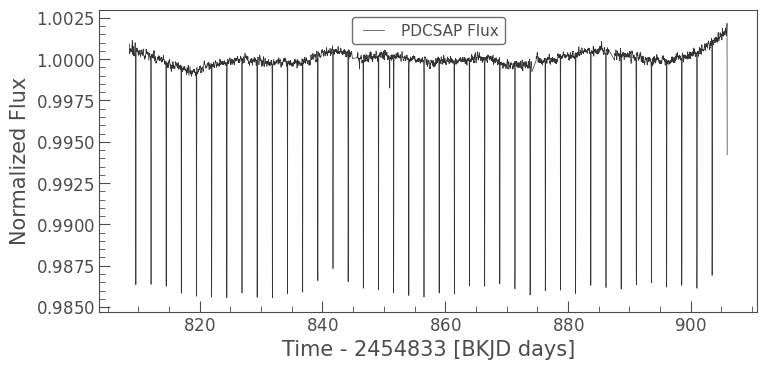

In [35]:
ax = source.plot(label='PDCSAP Flux', normalize=True)

The flux intensity from 2009 to 2014

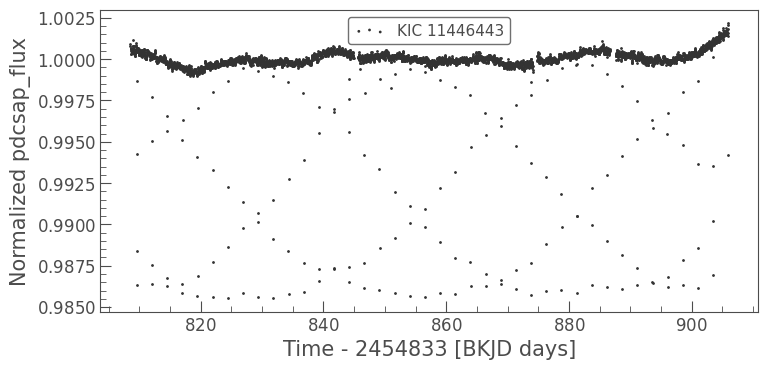

In [9]:
source.scatter(column='pdcsap_flux' ,normalize=True)

Lower order quadratic spline fitting ▶ outlier sigma clipping

In [30]:
flatten_lc, trend_lc = source.flatten(window_length=101, polyorder=2, sigma=2.5,return_trend=True)

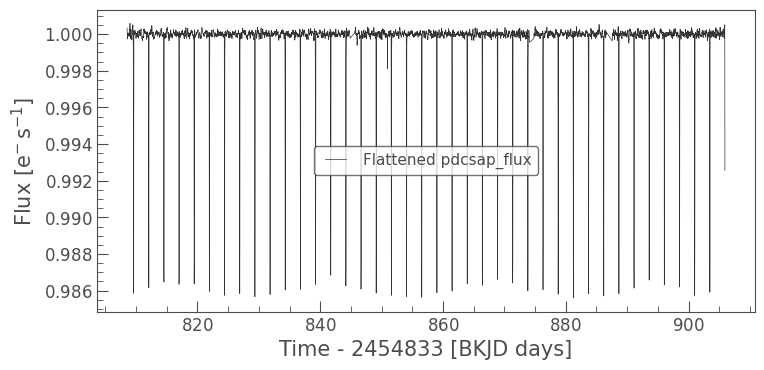

In [36]:
flatten_lc.plot(label='Flattened pdcsap_flux')

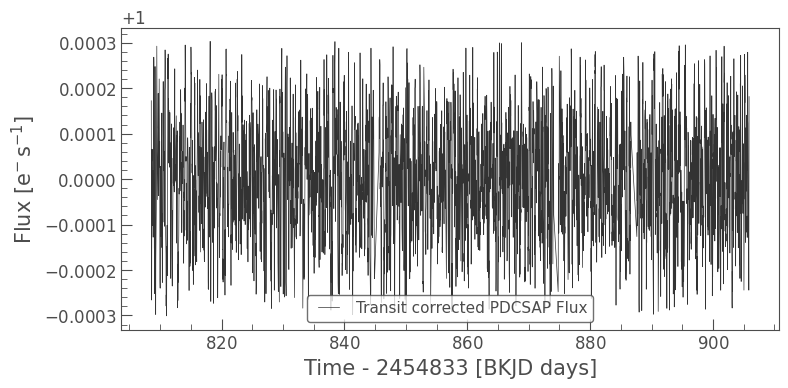

In [58]:
t_f_lc = flatten_lc.remove_outliers(sigma = 2.5)
ax = t_f_lc.plot( label='Transit corrected PDCSAP Flux')

Outlier sigma clipping ▶ lower order quadratic spline fitting

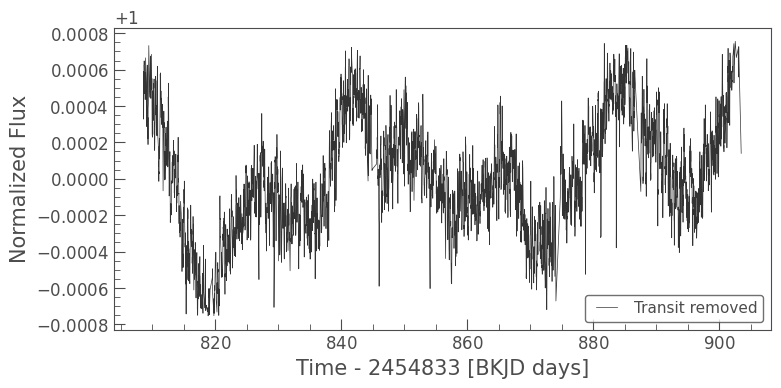

In [45]:
transit_lc=source.remove_outliers(sigma = 2.5)
transit_lc.plot(label='Transit removed', normalize='True')


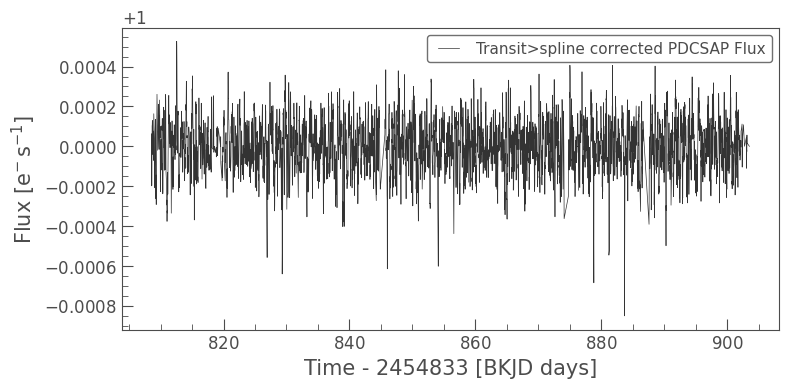

In [46]:
fitting_transit_lc, trend =transit_lc.flatten(window_length=101, polyorder=2, sigma=2.5,return_trend=True)
fitting_transit_lc.plot(label='Transit>spline corrected PDCSAP Flux')

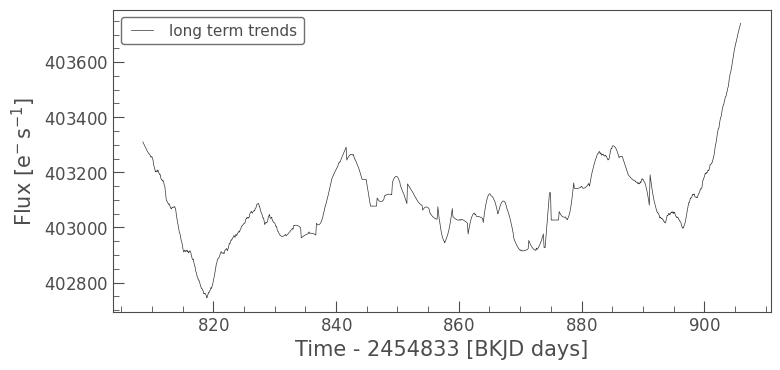

In [44]:
trend_lc.plot(label='long term trends')

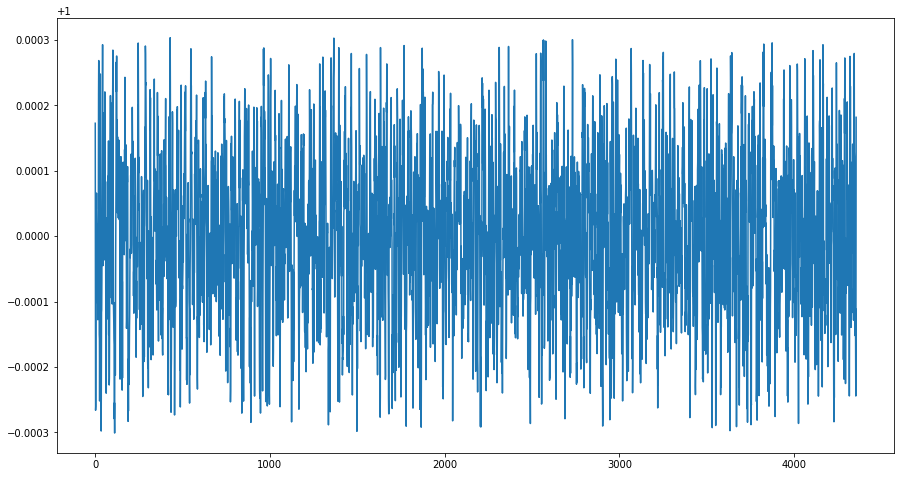

In [147]:
flux = t_f_lc.flux.value
time = t_f_lc.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [148]:
r_index = np.where(flux==flux.max()) 
flux[r_index] , time[r_index]

(array([1.00030322]), array([818.14080318]))

In [139]:
plc = t_f_lc.to_periodogram()

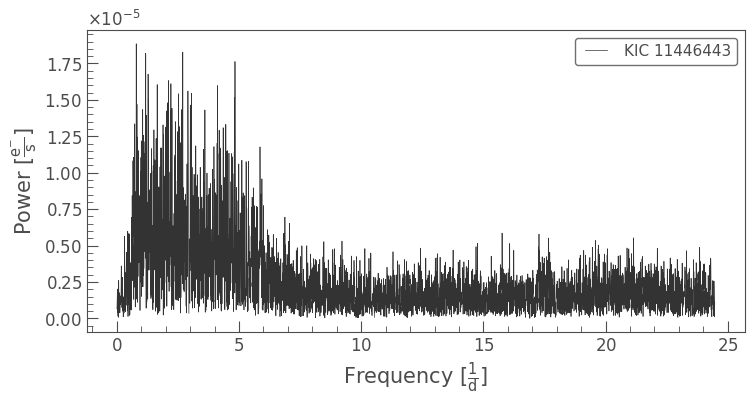

In [142]:
plc.plot()

In [118]:
len(flux)

4357

In [107]:
timesteps = np.linspace(0.0, N*dt, N)

In [112]:
new = flux*timesteps

In [131]:
smoothed_signal = convolve(flux, Box1DKernel(3))

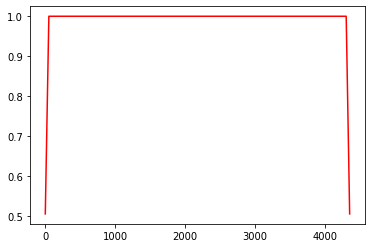

In [126]:
plt.scatter(smoothed_signal ,'r')

In [130]:
Box1DKernel(3).array

array([0.33333333, 0.33333333, 0.33333333])